In [1]:
import os
import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from datetime import datetime

from tqdm import tqdm
import json

from sklearn.preprocessing import normalize

In [2]:
from code import model
from code.data import Dataset
from code import epoch
from code import evaluation

In [3]:
root = os.getcwd()
batch = 8
forecast = 30
samples = 5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = "cpu"

# date_time = datetime.strftime(datetime.now(), "%Y-%m-%d_%H-%M")
date_time = "2021-04-09_14-33"

# Model

In [4]:
def load_checkpoint(filepath, device):

    encoder = model.Extractor(in_channels=1, out_channels=1)
    decoder = model.Decoder(classes=forecast) # forcast 30 days

    predictor = model.Model(encoder=encoder, decoder=decoder).to(device)
    
        
    if os.path.exists(filepath):
        checkpoint = torch.load(filepath)
        predictor.load_state_dict(checkpoint['model_stat'])
        optimizer = torch.optim.Adam(predictor.parameters(), lr=1e-4)
        optimizer.load_state_dict(checkpoint['optimizer_stat'])
        
        print("Find pretrain.")

    else:
        optimizer = torch.optim.Adam(predictor.parameters(), lr=1e-4)
        
        print("New model and optimizer")
        
    return predictor, optimizer

In [5]:
dataset = Dataset(path=os.path.join(root, "training.csv"))

In [6]:
predictor, optimizer = load_checkpoint(
                        filepath=os.path.join(root, "results", date_time, "{}.pth".format(date_time)),
                        device=device)

Find pretrain.


In [7]:
trainloader = DataLoader(dataset, batch_size=batch, shuffle=False, num_workers=2)

In [7]:
train_info = {
       "kendal": []
}

kendal_min = 1
for e in range(5000):
    
    train_loss = epoch.train_epoch(predictor, optimizer, trainloader, device)
    pr, gt = epoch.test_epoch(predictor, dataset, device)
    
    kendal = evaluation.normalised_kendall_tau_distance(gt, pr)
    train_info["kendal"].append(kendal)
    
    print("Epoch: {}, loss = {:.5f}, kendal = {:.5f}".format(e+1, train_loss, kendal))
    
    if kendal < kendal_min:
        checkpoint = {
            'model_stat': predictor.state_dict(),
            'optimizer_stat': optimizer.state_dict(),
        }

        torch.save(checkpoint, os.path.join(root, "results", date_time, "{}.pth".format(date_time)))
        kendal_min = kendal
    with open(os.path.join(root, "results", date_time, "{}.json".format(date_time)), 'w') as f:
        json.dump(train_info, f)

145it [00:10, 13.46it/s]
1158it [00:18, 61.07it/s]


Epoch: 1, loss = 0.69560, kendal = 0.59468


145it [00:10, 13.90it/s]
1158it [00:21, 53.86it/s]

Epoch: 2, loss = 0.69557, kendal = 0.56819



145it [00:11, 12.80it/s]
1158it [00:23, 50.00it/s]

Epoch: 3, loss = 0.69514, kendal = 0.60912



145it [00:10, 13.45it/s]
1158it [00:24, 48.07it/s]


Epoch: 4, loss = 0.69500, kendal = 0.58495


145it [00:12, 11.90it/s]
1158it [00:25, 45.08it/s]

Epoch: 5, loss = 0.69483, kendal = 0.59281



145it [00:12, 11.98it/s]
1158it [00:26, 43.63it/s]


Epoch: 6, loss = 0.69456, kendal = 0.56411


145it [00:09, 14.69it/s]
1158it [00:27, 42.46it/s]


Epoch: 7, loss = 0.69442, kendal = 0.43571


145it [00:11, 12.33it/s]
1158it [00:27, 41.68it/s]

Epoch: 8, loss = 0.69451, kendal = 0.36808



145it [00:12, 11.37it/s]
1158it [00:27, 42.03it/s]


Epoch: 9, loss = 0.69452, kendal = 0.35163


145it [00:15,  9.27it/s]
1158it [00:53, 21.78it/s]

Epoch: 10, loss = 0.69412, kendal = 0.34633



145it [00:16,  8.57it/s]
1158it [01:17, 14.92it/s]

Epoch: 11, loss = 0.69389, kendal = 0.31519



145it [00:24,  5.91it/s]
1158it [01:19, 14.52it/s]


Epoch: 12, loss = 0.69385, kendal = 0.31296


145it [00:24,  5.86it/s]
1158it [01:19, 14.54it/s]


Epoch: 13, loss = 0.69358, kendal = 0.29225


145it [00:24,  5.89it/s]
1158it [01:20, 14.44it/s]

Epoch: 14, loss = 0.69338, kendal = 0.31445



145it [00:25,  5.75it/s]
1158it [01:20, 14.30it/s]

Epoch: 15, loss = 0.69316, kendal = 0.31951



145it [00:26,  5.56it/s]
1158it [01:21, 14.21it/s]

Epoch: 16, loss = 0.69301, kendal = 0.31484



145it [00:26,  5.53it/s]
1158it [01:21, 14.23it/s]


Epoch: 17, loss = 0.69265, kendal = 0.30876


145it [00:25,  5.70it/s]
1158it [01:21, 14.28it/s]


Epoch: 18, loss = 0.69247, kendal = 0.31206


145it [00:24,  5.90it/s]
1158it [01:20, 14.43it/s]

Epoch: 19, loss = 0.69260, kendal = 0.30963



145it [00:24,  5.92it/s]
1158it [01:19, 14.48it/s]

Epoch: 20, loss = 0.69240, kendal = 0.30931



145it [00:24,  5.90it/s]
1158it [01:19, 14.48it/s]

Epoch: 21, loss = 0.69212, kendal = 0.30335



145it [00:24,  5.91it/s]
1158it [01:20, 14.45it/s]

Epoch: 22, loss = 0.69172, kendal = 0.31005



145it [00:24,  5.85it/s]
1158it [01:20, 14.32it/s]

Epoch: 23, loss = 0.69167, kendal = 0.31487



145it [00:25,  5.63it/s]
1158it [01:21, 14.19it/s]


Epoch: 24, loss = 0.69161, kendal = 0.30528


145it [00:25,  5.60it/s]
1158it [01:21, 14.16it/s]


Epoch: 25, loss = 0.69113, kendal = 0.30764


145it [00:25,  5.65it/s]
1158it [01:21, 14.27it/s]


Epoch: 26, loss = 0.69107, kendal = 0.31212


145it [00:24,  5.86it/s]
1158it [01:20, 14.39it/s]


Epoch: 27, loss = 0.69090, kendal = 0.28880


145it [00:24,  5.94it/s]
1158it [01:19, 14.50it/s]

Epoch: 28, loss = 0.69012, kendal = 0.27793



145it [00:24,  5.90it/s]
1158it [01:19, 14.55it/s]


Epoch: 29, loss = 0.68960, kendal = 0.27540


145it [00:24,  5.90it/s]
1158it [01:19, 14.51it/s]

Epoch: 30, loss = 0.68886, kendal = 0.27286



145it [00:24,  5.94it/s]
1158it [01:21, 14.27it/s]


Epoch: 31, loss = 0.68801, kendal = 0.27813


145it [00:25,  5.74it/s]
1158it [01:21, 14.17it/s]

Epoch: 32, loss = 0.68787, kendal = 0.27726



145it [00:26,  5.51it/s]
1158it [01:21, 14.13it/s]


Epoch: 33, loss = 0.68638, kendal = 0.27828


145it [00:25,  5.70it/s]
1158it [01:21, 14.23it/s]

Epoch: 34, loss = 0.68608, kendal = 0.27378



145it [00:25,  5.79it/s]
1158it [01:20, 14.31it/s]


Epoch: 35, loss = 0.68499, kendal = 0.27167


145it [00:24,  5.96it/s]
1158it [01:19, 14.48it/s]

Epoch: 36, loss = 0.68433, kendal = 0.27358



145it [00:24,  5.91it/s]
1158it [01:20, 14.44it/s]


Epoch: 37, loss = 0.68332, kendal = 0.28083


145it [00:24,  5.91it/s]
1158it [01:20, 14.44it/s]


Epoch: 38, loss = 0.68289, kendal = 0.27613


145it [00:24,  5.93it/s]
1158it [01:20, 14.36it/s]

Epoch: 39, loss = 0.68288, kendal = 0.27595



145it [00:25,  5.76it/s]
1158it [01:21, 14.22it/s]


Epoch: 40, loss = 0.68208, kendal = 0.27423


145it [00:25,  5.65it/s]
1158it [01:21, 14.15it/s]


Epoch: 41, loss = 0.68175, kendal = 0.27412


145it [00:26,  5.51it/s]
1158it [01:21, 14.18it/s]


Epoch: 42, loss = 0.68145, kendal = 0.27509


145it [00:25,  5.68it/s]
1158it [01:21, 14.26it/s]


Epoch: 43, loss = 0.68079, kendal = 0.27306


145it [00:24,  5.89it/s]
1158it [01:20, 14.40it/s]


Epoch: 44, loss = 0.68023, kendal = 0.27786


145it [00:24,  5.89it/s]
1158it [01:20, 14.44it/s]


Epoch: 45, loss = 0.68001, kendal = 0.28367


145it [00:24,  5.83it/s]
1158it [01:20, 14.41it/s]

Epoch: 46, loss = 0.67885, kendal = 0.27864



145it [00:24,  5.95it/s]
1158it [01:20, 14.38it/s]

Epoch: 47, loss = 0.67801, kendal = 0.28497



145it [00:24,  5.89it/s]
1158it [01:21, 14.23it/s]


Epoch: 48, loss = 0.67738, kendal = 0.28882


145it [00:25,  5.69it/s]
1158it [01:21, 14.21it/s]

Epoch: 49, loss = 0.67857, kendal = 0.28384



145it [00:25,  5.59it/s]
1158it [01:21, 14.15it/s]


Epoch: 50, loss = 0.67709, kendal = 0.28405


145it [00:26,  5.57it/s]
1158it [01:21, 14.24it/s]

Epoch: 51, loss = 0.67643, kendal = 0.28621



145it [00:25,  5.78it/s]
1158it [01:20, 14.30it/s]

Epoch: 52, loss = 0.67626, kendal = 0.28336



145it [00:24,  5.90it/s]
1158it [01:20, 14.47it/s]


Epoch: 53, loss = 0.67572, kendal = 0.28268


145it [00:24,  5.88it/s]
1158it [01:19, 14.49it/s]


Epoch: 54, loss = 0.67550, kendal = 0.28477


145it [00:24,  5.88it/s]
1158it [01:20, 14.47it/s]

Epoch: 55, loss = 0.67416, kendal = 0.28298



145it [00:24,  5.88it/s]
1158it [01:20, 14.35it/s]

Epoch: 56, loss = 0.67505, kendal = 0.28353



145it [00:24,  5.81it/s]
1158it [01:21, 14.21it/s]


Epoch: 57, loss = 0.67452, kendal = 0.28376


145it [00:25,  5.62it/s]
1158it [01:21, 14.13it/s]


Epoch: 58, loss = 0.67361, kendal = 0.28286


145it [00:26,  5.54it/s]
1158it [01:21, 14.23it/s]

Epoch: 59, loss = 0.67327, kendal = 0.28516



145it [00:25,  5.71it/s]
1158it [01:21, 14.25it/s]


Epoch: 60, loss = 0.67271, kendal = 0.28525


145it [00:24,  5.87it/s]
1158it [01:21, 14.29it/s]


Epoch: 61, loss = 0.67373, kendal = 0.28648


145it [00:24,  5.87it/s]
1158it [01:19, 14.48it/s]


Epoch: 62, loss = 0.67278, kendal = 0.28772


145it [00:24,  5.87it/s]
1158it [01:20, 14.46it/s]

Epoch: 63, loss = 0.67185, kendal = 0.28332



145it [00:24,  5.87it/s]
1158it [01:20, 14.40it/s]

Epoch: 64, loss = 0.67228, kendal = 0.28326



145it [00:24,  5.89it/s]
1158it [01:20, 14.30it/s]


Epoch: 65, loss = 0.67100, kendal = 0.28143


145it [00:25,  5.62it/s]
1158it [01:21, 14.21it/s]


Epoch: 66, loss = 0.66926, kendal = 0.28527


145it [00:26,  5.46it/s]
1158it [01:21, 14.13it/s]

Epoch: 67, loss = 0.67074, kendal = 0.28752



145it [00:26,  5.56it/s]
1158it [01:21, 14.23it/s]

Epoch: 68, loss = 0.67095, kendal = 0.29040



145it [00:25,  5.72it/s]
1158it [01:21, 14.22it/s]


Epoch: 69, loss = 0.67177, kendal = 0.28434


145it [00:24,  5.84it/s]
1158it [01:19, 14.49it/s]


Epoch: 70, loss = 0.67017, kendal = 0.29678


145it [00:24,  5.91it/s]
1158it [01:20, 14.43it/s]


Epoch: 71, loss = 0.67007, kendal = 0.29809


145it [00:24,  5.88it/s]
1158it [01:19, 14.50it/s]

Epoch: 72, loss = 0.67021, kendal = 0.29458



145it [00:24,  5.86it/s]
1158it [01:20, 14.41it/s]

Epoch: 73, loss = 0.66771, kendal = 0.29250



145it [00:24,  5.87it/s]
1158it [01:20, 14.32it/s]

Epoch: 74, loss = 0.66733, kendal = 0.29754



145it [00:25,  5.61it/s]
1158it [01:21, 14.15it/s]

Epoch: 75, loss = 0.66664, kendal = 0.31461



145it [00:26,  5.47it/s]
1158it [01:21, 14.15it/s]

Epoch: 76, loss = 0.66599, kendal = 0.31145



145it [00:25,  5.65it/s]
1158it [01:21, 14.26it/s]


Epoch: 77, loss = 0.66450, kendal = 0.31807


145it [00:24,  5.84it/s]
1158it [01:20, 14.36it/s]

Epoch: 78, loss = 0.66401, kendal = 0.31725



145it [00:24,  5.86it/s]
1158it [01:20, 14.39it/s]


Epoch: 79, loss = 0.66227, kendal = 0.32037


145it [00:24,  5.86it/s]
1158it [01:19, 14.50it/s]

Epoch: 80, loss = 0.66270, kendal = 0.32647



145it [00:24,  5.87it/s]
1158it [01:19, 14.48it/s]


Epoch: 81, loss = 0.66342, kendal = 0.32228


145it [00:24,  5.86it/s]
1158it [01:20, 14.35it/s]


Epoch: 82, loss = 0.66188, kendal = 0.33236


145it [00:25,  5.78it/s]
1158it [01:21, 14.23it/s]


Epoch: 83, loss = 0.66189, kendal = 0.33725


145it [00:26,  5.53it/s]
1158it [01:21, 14.14it/s]


Epoch: 84, loss = 0.66006, kendal = 0.33469


145it [00:26,  5.49it/s]
1158it [01:21, 14.21it/s]

Epoch: 85, loss = 0.65867, kendal = 0.32942



145it [00:25,  5.62it/s]
1158it [01:20, 14.30it/s]

Epoch: 86, loss = 0.65809, kendal = 0.33692



145it [00:24,  5.83it/s]
1158it [01:20, 14.43it/s]


Epoch: 87, loss = 0.65696, kendal = 0.31712


145it [00:24,  5.83it/s]
1158it [01:19, 14.49it/s]


Epoch: 88, loss = 0.65560, kendal = 0.32860


145it [00:24,  5.86it/s]
1158it [01:20, 14.45it/s]

Epoch: 89, loss = 0.65433, kendal = 0.33599



145it [00:24,  5.90it/s]
1158it [01:20, 14.44it/s]


Epoch: 90, loss = 0.65394, kendal = 0.30154


145it [00:24,  5.87it/s]
1158it [01:21, 14.28it/s]


Epoch: 91, loss = 0.65083, kendal = 0.28944


145it [00:25,  5.66it/s]
1158it [01:21, 14.21it/s]


Epoch: 92, loss = 0.64991, kendal = 0.31164


145it [00:26,  5.46it/s]
1158it [01:21, 14.19it/s]

Epoch: 93, loss = 0.65127, kendal = 0.30394



145it [00:26,  5.46it/s]
1158it [01:21, 14.21it/s]


Epoch: 94, loss = 0.64853, kendal = 0.32245


145it [00:25,  5.72it/s]
1158it [01:20, 14.34it/s]

Epoch: 95, loss = 0.64719, kendal = 0.34841



145it [00:24,  5.87it/s]
1158it [01:20, 14.36it/s]

Epoch: 96, loss = 0.64646, kendal = 0.34294



145it [00:24,  5.84it/s]
1158it [01:20, 14.41it/s]


Epoch: 97, loss = 0.65129, kendal = 0.34629


145it [00:24,  5.90it/s]
1158it [01:20, 14.42it/s]


Epoch: 98, loss = 0.64507, kendal = 0.35971


145it [00:24,  5.84it/s]
1158it [01:20, 14.43it/s]

Epoch: 99, loss = 0.64998, kendal = 0.37174



145it [00:24,  5.86it/s]
1158it [01:21, 14.23it/s]


Epoch: 100, loss = 0.64361, kendal = 0.37408


145it [00:25,  5.63it/s]
1158it [01:21, 14.21it/s]


Epoch: 101, loss = 0.64532, kendal = 0.36141


145it [00:26,  5.48it/s]
1158it [01:21, 14.14it/s]

Epoch: 102, loss = 0.64501, kendal = 0.38309



145it [00:26,  5.51it/s]
1158it [01:21, 14.24it/s]


Epoch: 103, loss = 0.64547, kendal = 0.34290


145it [00:25,  5.68it/s]
1158it [01:21, 14.28it/s]

Epoch: 104, loss = 0.64323, kendal = 0.33909



145it [00:24,  5.83it/s]
1158it [01:20, 14.44it/s]


Epoch: 105, loss = 0.63813, kendal = 0.36561


145it [00:24,  5.84it/s]
1158it [01:19, 14.52it/s]

Epoch: 106, loss = 0.64064, kendal = 0.36429



145it [00:24,  5.89it/s]
1158it [01:20, 14.43it/s]

Epoch: 107, loss = 0.63897, kendal = 0.34167



145it [00:24,  5.87it/s]
1158it [01:20, 14.35it/s]

Epoch: 108, loss = 0.63718, kendal = 0.33468



145it [00:24,  5.82it/s]
1158it [01:21, 14.22it/s]


Epoch: 109, loss = 0.63518, kendal = 0.37106


145it [00:25,  5.68it/s]
1158it [01:21, 14.22it/s]

Epoch: 110, loss = 0.63565, kendal = 0.34258



145it [00:26,  5.53it/s]
1158it [01:21, 14.14it/s]

Epoch: 111, loss = 0.63575, kendal = 0.31922



145it [00:25,  5.64it/s]
1158it [01:21, 14.20it/s]


Epoch: 112, loss = 0.63492, kendal = 0.33309


145it [00:25,  5.78it/s]
1158it [01:20, 14.33it/s]

Epoch: 113, loss = 0.65270, kendal = 0.39350



145it [00:24,  5.87it/s]
1158it [01:20, 14.42it/s]


Epoch: 114, loss = 0.64341, kendal = 0.34257


145it [00:24,  5.85it/s]
1158it [01:20, 14.41it/s]

Epoch: 115, loss = 0.64005, kendal = 0.40353



145it [00:24,  5.89it/s]
1158it [01:20, 14.42it/s]


Epoch: 116, loss = 0.64033, kendal = 0.35219


145it [00:24,  5.84it/s]
1158it [01:20, 14.31it/s]


Epoch: 117, loss = 0.64109, kendal = 0.41419


145it [00:25,  5.75it/s]
1158it [01:21, 14.20it/s]

Epoch: 118, loss = 0.63862, kendal = 0.38658



145it [00:25,  5.63it/s]
1158it [01:21, 14.18it/s]

Epoch: 119, loss = 0.63389, kendal = 0.42340



145it [00:26,  5.45it/s]
1158it [01:21, 14.16it/s]


Epoch: 120, loss = 0.64153, kendal = 0.42756


145it [00:26,  5.56it/s]
1158it [01:21, 14.27it/s]

Epoch: 121, loss = 0.67222, kendal = 0.31117



145it [00:24,  5.86it/s]
1158it [01:20, 14.34it/s]

Epoch: 122, loss = 0.63458, kendal = 0.37920



145it [00:24,  5.85it/s]
1158it [01:20, 14.47it/s]

Epoch: 123, loss = 0.63176, kendal = 0.41159



145it [00:24,  5.88it/s]
1158it [01:20, 14.37it/s]

Epoch: 124, loss = 0.62987, kendal = 0.38515



145it [00:24,  5.91it/s]
1158it [01:20, 14.42it/s]


Epoch: 125, loss = 0.62568, kendal = 0.34067


145it [00:24,  5.87it/s]
1158it [01:20, 14.38it/s]

Epoch: 126, loss = 0.62642, kendal = 0.38668



145it [00:25,  5.72it/s]
1158it [01:21, 14.17it/s]

Epoch: 127, loss = 0.62816, kendal = 0.43302



145it [00:26,  5.55it/s]
1158it [01:21, 14.20it/s]

Epoch: 128, loss = 0.63745, kendal = 0.44609



145it [00:26,  5.47it/s]
1158it [01:21, 14.12it/s]

Epoch: 129, loss = 0.63023, kendal = 0.36971



145it [00:25,  5.62it/s]
1158it [01:21, 14.27it/s]


Epoch: 130, loss = 0.61955, kendal = 0.37344


145it [00:25,  5.80it/s]
1158it [01:20, 14.35it/s]


Epoch: 131, loss = 0.62005, kendal = 0.39874


145it [00:24,  5.82it/s]
1158it [01:20, 14.47it/s]


Epoch: 132, loss = 0.61837, kendal = 0.37260


145it [00:24,  5.95it/s]
1158it [01:20, 14.40it/s]


Epoch: 133, loss = 0.62376, kendal = 0.38027


145it [00:24,  5.87it/s]
1158it [01:20, 14.41it/s]


Epoch: 134, loss = 0.61819, kendal = 0.40934


145it [00:24,  5.85it/s]
1158it [01:20, 14.38it/s]

Epoch: 135, loss = 0.62359, kendal = 0.41544



145it [00:25,  5.73it/s]
1158it [01:21, 14.19it/s]

Epoch: 136, loss = 0.62021, kendal = 0.40490



145it [00:26,  5.49it/s]
1158it [01:21, 14.17it/s]

Epoch: 137, loss = 0.62601, kendal = 0.44653



145it [00:26,  5.41it/s]
1158it [01:21, 14.16it/s]

Epoch: 138, loss = 0.61381, kendal = 0.38988



145it [00:25,  5.64it/s]
1158it [01:20, 14.30it/s]


Epoch: 139, loss = 0.61445, kendal = 0.41550


145it [00:25,  5.80it/s]
1158it [01:20, 14.36it/s]

Epoch: 140, loss = 0.61386, kendal = 0.42227



145it [00:24,  5.85it/s]
1158it [01:20, 14.38it/s]


Epoch: 141, loss = 0.61073, kendal = 0.37923


145it [00:24,  5.85it/s]
1158it [01:20, 14.45it/s]


Epoch: 142, loss = 0.62087, kendal = 0.40442


145it [00:24,  5.84it/s]
1158it [01:20, 14.44it/s]

Epoch: 143, loss = 0.64937, kendal = 0.34601



145it [00:24,  5.86it/s]
1158it [01:20, 14.34it/s]

Epoch: 144, loss = 0.62537, kendal = 0.39750



145it [00:25,  5.70it/s]
1158it [01:21, 14.24it/s]

Epoch: 145, loss = 0.62079, kendal = 0.36030



145it [00:26,  5.49it/s]
1158it [01:21, 14.17it/s]

Epoch: 146, loss = 0.61983, kendal = 0.39305



145it [00:26,  5.43it/s]
1158it [01:21, 14.22it/s]


Epoch: 147, loss = 0.61300, kendal = 0.33812


145it [00:25,  5.60it/s]
1158it [01:21, 14.27it/s]


Epoch: 148, loss = 0.61481, kendal = 0.41901


145it [00:24,  5.81it/s]
1158it [01:20, 14.35it/s]

Epoch: 149, loss = 0.62012, kendal = 0.36880



145it [00:24,  5.86it/s]
1158it [01:20, 14.42it/s]


Epoch: 150, loss = 0.60963, kendal = 0.39196


145it [00:24,  5.85it/s]
1158it [01:20, 14.47it/s]

Epoch: 151, loss = 0.60948, kendal = 0.47097



145it [00:24,  5.82it/s]
1158it [01:20, 14.40it/s]

Epoch: 152, loss = 0.60826, kendal = 0.38631



145it [00:24,  5.91it/s]
1158it [01:20, 14.30it/s]

Epoch: 153, loss = 0.60605, kendal = 0.38387



145it [00:25,  5.76it/s]
1158it [01:21, 14.21it/s]

Epoch: 154, loss = 0.60222, kendal = 0.41920



145it [00:26,  5.51it/s]
1158it [01:21, 14.12it/s]

Epoch: 155, loss = 0.60686, kendal = 0.40400



145it [00:26,  5.42it/s]
1158it [01:21, 14.19it/s]

Epoch: 156, loss = 0.60572, kendal = 0.49003



145it [00:25,  5.68it/s]
1158it [01:21, 14.25it/s]

Epoch: 157, loss = 0.59968, kendal = 0.40358



145it [00:24,  5.86it/s]
1158it [01:20, 14.36it/s]


Epoch: 158, loss = 0.59756, kendal = 0.39782


145it [00:24,  5.86it/s]
1158it [01:20, 14.41it/s]


Epoch: 159, loss = 0.59527, kendal = 0.47179


145it [00:24,  5.83it/s]
1158it [01:20, 14.42it/s]

Epoch: 160, loss = 0.59850, kendal = 0.38374



145it [00:24,  5.85it/s]
1158it [01:20, 14.34it/s]


Epoch: 161, loss = 0.60040, kendal = 0.47700


145it [00:24,  5.89it/s]
1158it [01:21, 14.29it/s]

Epoch: 162, loss = 0.60105, kendal = 0.47481



145it [00:25,  5.72it/s]
1158it [01:21, 14.20it/s]

Epoch: 163, loss = 0.60167, kendal = 0.34983



145it [00:26,  5.53it/s]
1158it [01:21, 14.19it/s]


Epoch: 164, loss = 0.60015, kendal = 0.34800


145it [00:26,  5.41it/s]
1158it [01:21, 14.20it/s]


Epoch: 165, loss = 0.61362, kendal = 0.41295


145it [00:25,  5.68it/s]
1158it [01:21, 14.25it/s]

Epoch: 166, loss = 0.63696, kendal = 0.45602



145it [00:25,  5.78it/s]
1158it [01:20, 14.36it/s]


Epoch: 167, loss = 0.61968, kendal = 0.32089


145it [00:24,  5.82it/s]
1158it [01:20, 14.39it/s]


Epoch: 168, loss = 0.61363, kendal = 0.43030


145it [00:24,  5.80it/s]
1158it [01:19, 14.52it/s]

Epoch: 169, loss = 0.61810, kendal = 0.40085



145it [00:24,  5.85it/s]
1158it [01:20, 14.43it/s]


Epoch: 170, loss = 0.59867, kendal = 0.40604


145it [00:24,  5.87it/s]
1158it [01:21, 14.28it/s]


Epoch: 171, loss = 0.60511, kendal = 0.48181


145it [00:25,  5.74it/s]
1158it [01:21, 14.19it/s]

Epoch: 172, loss = 0.59236, kendal = 0.47319



145it [00:26,  5.50it/s]
1158it [01:21, 14.20it/s]


Epoch: 173, loss = 0.59182, kendal = 0.35242


145it [00:26,  5.49it/s]
1158it [01:21, 14.21it/s]


Epoch: 174, loss = 0.58858, kendal = 0.31660


145it [00:25,  5.59it/s]
1158it [01:21, 14.25it/s]

Epoch: 175, loss = 0.59107, kendal = 0.43459



145it [00:25,  5.80it/s]
1158it [01:20, 14.42it/s]

Epoch: 176, loss = 0.58528, kendal = 0.37577



145it [00:24,  5.85it/s]
1158it [01:20, 14.43it/s]

Epoch: 177, loss = 0.58441, kendal = 0.47613



145it [00:24,  5.90it/s]
1158it [01:20, 14.42it/s]

Epoch: 178, loss = 0.58375, kendal = 0.44945



145it [00:24,  5.87it/s]
1158it [01:20, 14.42it/s]


Epoch: 179, loss = 0.58294, kendal = 0.44203


145it [00:24,  5.87it/s]
1158it [01:21, 14.25it/s]

Epoch: 180, loss = 0.58116, kendal = 0.43020



145it [00:25,  5.74it/s]
1158it [01:21, 14.21it/s]

Epoch: 181, loss = 0.57938, kendal = 0.48009



145it [00:26,  5.53it/s]
1158it [01:21, 14.14it/s]


Epoch: 182, loss = 0.58441, kendal = 0.42972


145it [00:26,  5.50it/s]
1158it [01:21, 14.25it/s]


Epoch: 183, loss = 0.58206, kendal = 0.45905


145it [00:25,  5.62it/s]
1158it [01:21, 14.26it/s]

Epoch: 184, loss = 0.57944, kendal = 0.47839



145it [00:24,  5.84it/s]
1158it [01:20, 14.37it/s]

Epoch: 185, loss = 0.58578, kendal = 0.42739



145it [00:24,  5.86it/s]
1158it [01:20, 14.42it/s]


Epoch: 186, loss = 0.58022, kendal = 0.48100


145it [00:24,  5.84it/s]
1158it [01:20, 14.38it/s]

Epoch: 187, loss = 0.58144, kendal = 0.45871



145it [00:24,  5.86it/s]
1158it [01:19, 14.48it/s]

Epoch: 188, loss = 0.57970, kendal = 0.44375



145it [00:24,  5.85it/s]
1158it [01:20, 14.32it/s]

Epoch: 189, loss = 0.58615, kendal = 0.46736



145it [00:25,  5.71it/s]
1158it [01:21, 14.21it/s]

Epoch: 190, loss = 0.59212, kendal = 0.47342



145it [00:26,  5.45it/s]
1158it [01:22, 14.11it/s]

Epoch: 191, loss = 0.58497, kendal = 0.51163



145it [00:26,  5.56it/s]
1158it [01:21, 14.23it/s]

Epoch: 192, loss = 0.58178, kendal = 0.47412



145it [00:25,  5.63it/s]
1158it [01:21, 14.24it/s]

Epoch: 193, loss = 0.58297, kendal = 0.49704



145it [00:24,  5.85it/s]
1158it [01:19, 14.48it/s]


Epoch: 194, loss = 0.57674, kendal = 0.51193


145it [00:24,  5.81it/s]
1158it [01:20, 14.44it/s]

Epoch: 195, loss = 0.57219, kendal = 0.50120



145it [00:24,  5.85it/s]
1158it [01:20, 14.40it/s]


Epoch: 196, loss = 0.57720, kendal = 0.51685


145it [00:24,  5.84it/s]
1158it [01:20, 14.40it/s]


Epoch: 197, loss = 0.58065, kendal = 0.52909


145it [00:24,  5.85it/s]
1158it [01:21, 14.30it/s]


Epoch: 198, loss = 0.57871, kendal = 0.41105


145it [00:25,  5.64it/s]
1158it [01:21, 14.22it/s]

Epoch: 199, loss = 0.59355, kendal = 0.47386



145it [00:26,  5.54it/s]
1158it [01:21, 14.15it/s]

Epoch: 200, loss = 0.63178, kendal = 0.45709



145it [00:26,  5.57it/s]
1158it [01:21, 14.24it/s]


Epoch: 201, loss = 0.58394, kendal = 0.52580


145it [00:25,  5.72it/s]
1158it [01:21, 14.28it/s]

Epoch: 202, loss = 0.57728, kendal = 0.50393



145it [00:24,  5.84it/s]
1158it [01:20, 14.43it/s]

Epoch: 203, loss = 0.57704, kendal = 0.46601



145it [00:24,  5.88it/s]
1158it [01:20, 14.43it/s]


Epoch: 204, loss = 0.57534, kendal = 0.48475


145it [00:24,  5.86it/s]
1158it [01:20, 14.41it/s]

Epoch: 205, loss = 0.58190, kendal = 0.51107



145it [00:24,  5.90it/s]
1158it [01:20, 14.39it/s]


Epoch: 206, loss = 0.57874, kendal = 0.48081


145it [00:24,  5.85it/s]
1158it [01:20, 14.30it/s]

Epoch: 207, loss = 0.56688, kendal = 0.39218



145it [00:25,  5.61it/s]
1158it [01:21, 14.16it/s]


Epoch: 208, loss = 0.56403, kendal = 0.36968


145it [00:26,  5.47it/s]
1158it [01:21, 14.18it/s]

Epoch: 209, loss = 0.56102, kendal = 0.38242



145it [00:26,  5.46it/s]
1158it [01:21, 14.21it/s]

Epoch: 210, loss = 0.56108, kendal = 0.36392



145it [00:25,  5.74it/s]
1158it [01:20, 14.33it/s]

Epoch: 211, loss = 0.55789, kendal = 0.39451



145it [00:24,  5.83it/s]
1158it [01:20, 14.44it/s]

Epoch: 212, loss = 0.55620, kendal = 0.40950



145it [00:24,  5.86it/s]
1158it [01:19, 14.53it/s]

Epoch: 213, loss = 0.55490, kendal = 0.44042



145it [00:24,  5.81it/s]
1158it [01:20, 14.42it/s]

Epoch: 214, loss = 0.55359, kendal = 0.42992



145it [00:24,  5.88it/s]
1158it [01:20, 14.31it/s]

Epoch: 215, loss = 0.55219, kendal = 0.42914



145it [00:25,  5.78it/s]
1158it [01:21, 14.23it/s]

Epoch: 216, loss = 0.56833, kendal = 0.41117



145it [00:26,  5.51it/s]
1158it [01:21, 14.18it/s]


Epoch: 217, loss = 0.57086, kendal = 0.43914


145it [00:26,  5.40it/s]
1158it [01:21, 14.18it/s]


Epoch: 218, loss = 0.57079, kendal = 0.43057


145it [00:26,  5.50it/s]
1158it [01:21, 14.20it/s]

Epoch: 219, loss = 0.56310, kendal = 0.44654



145it [00:25,  5.65it/s]
1158it [01:21, 14.29it/s]


Epoch: 220, loss = 0.54987, kendal = 0.42964


145it [00:24,  5.85it/s]
1158it [01:20, 14.45it/s]


Epoch: 221, loss = 0.54916, kendal = 0.44077


145it [00:24,  5.83it/s]
1158it [01:20, 14.44it/s]


Epoch: 222, loss = 0.55129, kendal = 0.45683


145it [00:24,  5.83it/s]
1158it [01:19, 14.53it/s]


Epoch: 223, loss = 0.54496, kendal = 0.45434


145it [00:24,  5.85it/s]
1158it [01:20, 14.34it/s]

Epoch: 224, loss = 0.54577, kendal = 0.47365



145it [00:24,  5.81it/s]
1158it [01:21, 14.29it/s]

Epoch: 225, loss = 0.54194, kendal = 0.43675



145it [00:25,  5.61it/s]
1158it [01:21, 14.20it/s]

Epoch: 226, loss = 0.55468, kendal = 0.43674



145it [00:26,  5.43it/s]
1158it [01:21, 14.16it/s]

Epoch: 227, loss = 0.54480, kendal = 0.50523



145it [00:25,  5.58it/s]
1158it [01:21, 14.22it/s]

Epoch: 228, loss = 0.54695, kendal = 0.43890



145it [00:25,  5.75it/s]
1158it [01:20, 14.32it/s]


Epoch: 229, loss = 0.55711, kendal = 0.45810


145it [00:24,  5.83it/s]
1158it [01:20, 14.42it/s]


Epoch: 230, loss = 0.54770, kendal = 0.42342


145it [00:24,  5.82it/s]
1158it [01:20, 14.41it/s]

Epoch: 231, loss = 0.54136, kendal = 0.47823



145it [00:24,  5.85it/s]
1158it [01:20, 14.39it/s]


Epoch: 232, loss = 0.53783, kendal = 0.45533


145it [00:24,  5.87it/s]
1158it [01:20, 14.36it/s]

Epoch: 233, loss = 0.53655, kendal = 0.46053



145it [00:25,  5.80it/s]
1158it [01:21, 14.24it/s]


Epoch: 234, loss = 0.53162, kendal = 0.48157


145it [00:25,  5.58it/s]
1158it [01:21, 14.18it/s]


Epoch: 235, loss = 0.53615, kendal = 0.50879


145it [00:26,  5.48it/s]
1158it [01:21, 14.19it/s]


Epoch: 236, loss = 0.53397, kendal = 0.45702


145it [00:26,  5.54it/s]
1158it [01:21, 14.18it/s]


Epoch: 237, loss = 0.54454, kendal = 0.33018


145it [00:25,  5.75it/s]
1158it [01:20, 14.34it/s]

Epoch: 238, loss = 0.54628, kendal = 0.50196



145it [00:24,  5.86it/s]
1158it [01:20, 14.43it/s]

Epoch: 239, loss = 0.54395, kendal = 0.43915



145it [00:24,  5.87it/s]
1158it [01:19, 14.49it/s]

Epoch: 240, loss = 0.53773, kendal = 0.46210



145it [00:24,  5.84it/s]
1158it [01:20, 14.42it/s]


Epoch: 241, loss = 0.52775, kendal = 0.41696


145it [00:24,  5.84it/s]
1158it [01:20, 14.30it/s]


Epoch: 242, loss = 0.53110, kendal = 0.40146


145it [00:25,  5.80it/s]
1158it [01:21, 14.24it/s]

Epoch: 243, loss = 0.53737, kendal = 0.42145



145it [00:26,  5.56it/s]
1158it [01:21, 14.18it/s]

Epoch: 244, loss = 0.52641, kendal = 0.48706



145it [00:26,  5.41it/s]
1158it [01:21, 14.17it/s]


Epoch: 245, loss = 0.52936, kendal = 0.44561


145it [00:25,  5.58it/s]
1158it [01:21, 14.18it/s]

Epoch: 246, loss = 0.54785, kendal = 0.40788



145it [00:25,  5.77it/s]
1158it [01:20, 14.33it/s]

Epoch: 247, loss = 0.54600, kendal = 0.41511



145it [00:24,  5.85it/s]
1158it [01:20, 14.38it/s]

Epoch: 248, loss = 0.52794, kendal = 0.45405



145it [00:24,  5.84it/s]
1158it [01:20, 14.42it/s]

Epoch: 249, loss = 0.52254, kendal = 0.38150



145it [00:24,  5.85it/s]
1158it [01:20, 14.43it/s]


Epoch: 250, loss = 0.53589, kendal = 0.45044


145it [00:24,  5.86it/s]
1158it [01:20, 14.34it/s]


Epoch: 251, loss = 0.53334, kendal = 0.42189


145it [00:25,  5.80it/s]
1158it [01:21, 14.24it/s]


Epoch: 252, loss = 0.52002, kendal = 0.45783


145it [00:25,  5.62it/s]
1158it [01:21, 14.19it/s]


Epoch: 253, loss = 0.51716, kendal = 0.51706


145it [00:26,  5.48it/s]
1158it [01:21, 14.15it/s]


Epoch: 254, loss = 0.51618, kendal = 0.53466


145it [00:26,  5.53it/s]
1158it [01:21, 14.23it/s]


Epoch: 255, loss = 0.52631, kendal = 0.49042


145it [00:25,  5.75it/s]
1158it [01:20, 14.33it/s]

Epoch: 256, loss = 0.52429, kendal = 0.48240



145it [00:24,  5.81it/s]
1158it [01:20, 14.43it/s]


Epoch: 257, loss = 0.51339, kendal = 0.43610


145it [00:24,  5.84it/s]
1158it [01:20, 14.45it/s]

Epoch: 258, loss = 0.51646, kendal = 0.53396



145it [00:24,  5.84it/s]
1158it [01:20, 14.44it/s]


Epoch: 259, loss = 0.62056, kendal = 0.47502


145it [00:24,  5.86it/s]
1158it [01:20, 14.31it/s]


Epoch: 260, loss = 0.63063, kendal = 0.48463


145it [00:25,  5.78it/s]
1158it [01:21, 14.24it/s]

Epoch: 261, loss = 0.56855, kendal = 0.40522



145it [00:26,  5.54it/s]
1158it [01:21, 14.19it/s]

Epoch: 262, loss = 0.55469, kendal = 0.44846



145it [00:26,  5.44it/s]
1158it [01:21, 14.15it/s]


Epoch: 263, loss = 0.54757, kendal = 0.44094


145it [00:25,  5.62it/s]
1158it [01:21, 14.23it/s]


Epoch: 264, loss = 0.56675, kendal = 0.43495


145it [00:25,  5.73it/s]
1158it [01:20, 14.33it/s]

Epoch: 265, loss = 0.53052, kendal = 0.42913



145it [00:24,  5.84it/s]
1158it [01:20, 14.39it/s]


Epoch: 266, loss = 0.52778, kendal = 0.44621


145it [00:24,  5.84it/s]
1158it [01:20, 14.41it/s]


Epoch: 267, loss = 0.53117, kendal = 0.43021


145it [00:24,  5.87it/s]
1158it [01:19, 14.49it/s]

Epoch: 268, loss = 0.52989, kendal = 0.51413



145it [00:24,  5.86it/s]
1158it [01:20, 14.32it/s]


Epoch: 269, loss = 0.52726, kendal = 0.46827


145it [00:24,  5.86it/s]
1158it [01:21, 14.25it/s]


Epoch: 270, loss = 0.52619, kendal = 0.50093


145it [00:25,  5.58it/s]
1158it [01:21, 14.17it/s]

Epoch: 271, loss = 0.52895, kendal = 0.51479



145it [00:26,  5.48it/s]
1158it [01:21, 14.14it/s]


Epoch: 272, loss = 0.54040, kendal = 0.46484


145it [00:25,  5.59it/s]
1158it [01:21, 14.28it/s]


Epoch: 273, loss = 0.54735, kendal = 0.36302


145it [00:25,  5.77it/s]
1158it [01:20, 14.31it/s]

Epoch: 274, loss = 0.53080, kendal = 0.42631



145it [00:24,  5.89it/s]
1158it [01:20, 14.44it/s]

Epoch: 275, loss = 0.52996, kendal = 0.52556



145it [00:24,  5.88it/s]
1158it [01:20, 14.43it/s]

Epoch: 276, loss = 0.51519, kendal = 0.53103



145it [00:24,  5.83it/s]
1158it [01:20, 14.42it/s]


Epoch: 277, loss = 0.51160, kendal = 0.53039


145it [00:24,  5.84it/s]
1158it [01:20, 14.34it/s]

Epoch: 278, loss = 0.51575, kendal = 0.52930



145it [00:25,  5.75it/s]
1158it [01:21, 14.22it/s]


Epoch: 279, loss = 0.52690, kendal = 0.50894


145it [00:26,  5.56it/s]
1158it [01:21, 14.16it/s]

Epoch: 280, loss = 0.54442, kendal = 0.41126



145it [00:26,  5.51it/s]
1158it [01:21, 14.20it/s]


Epoch: 281, loss = 0.53289, kendal = 0.46045


145it [00:26,  5.57it/s]
1158it [01:21, 14.26it/s]

Epoch: 282, loss = 0.51931, kendal = 0.41578



145it [00:25,  5.77it/s]
1158it [01:20, 14.40it/s]


Epoch: 283, loss = 0.51308, kendal = 0.41856


145it [00:24,  5.86it/s]
1158it [01:20, 14.44it/s]

Epoch: 284, loss = 0.50974, kendal = 0.39984



145it [00:24,  5.85it/s]
1158it [01:20, 14.41it/s]

Epoch: 285, loss = 0.50688, kendal = 0.42431



145it [00:24,  5.85it/s]
1158it [01:20, 14.39it/s]

Epoch: 286, loss = 0.50312, kendal = 0.41023



145it [00:24,  5.86it/s]
1158it [01:20, 14.34it/s]

Epoch: 287, loss = 0.50409, kendal = 0.42086



145it [00:25,  5.80it/s]
1158it [01:21, 14.25it/s]


Epoch: 288, loss = 0.50288, kendal = 0.41895


145it [00:26,  5.51it/s]
1158it [01:21, 14.20it/s]

Epoch: 289, loss = 0.51252, kendal = 0.48562



145it [00:26,  5.47it/s]
1158it [01:21, 14.18it/s]


Epoch: 290, loss = 0.52258, kendal = 0.54538


145it [00:25,  5.66it/s]
1158it [01:21, 14.29it/s]

Epoch: 291, loss = 0.51053, kendal = 0.33805



145it [00:24,  5.86it/s]
1158it [01:20, 14.37it/s]


Epoch: 292, loss = 0.53963, kendal = 0.47667


145it [00:24,  5.86it/s]
1158it [01:20, 14.40it/s]

Epoch: 293, loss = 0.51212, kendal = 0.30087



145it [00:24,  5.92it/s]
1158it [01:19, 14.51it/s]

Epoch: 294, loss = 0.52795, kendal = 0.44416



145it [00:24,  5.87it/s]
1158it [01:20, 14.40it/s]

Epoch: 295, loss = 0.50783, kendal = 0.48725



145it [00:24,  5.85it/s]
1158it [01:20, 14.33it/s]


Epoch: 296, loss = 0.49473, kendal = 0.49794


145it [00:25,  5.73it/s]
1158it [01:21, 14.14it/s]


Epoch: 297, loss = 0.49528, kendal = 0.53739


145it [00:26,  5.53it/s]
1158it [01:21, 14.14it/s]


Epoch: 298, loss = 0.49693, kendal = 0.47100


145it [00:26,  5.46it/s]
1158it [01:21, 14.23it/s]

Epoch: 299, loss = 0.49548, kendal = 0.42760



145it [00:25,  5.68it/s]
1158it [01:21, 14.24it/s]

Epoch: 300, loss = 0.49271, kendal = 0.50671



145it [00:24,  5.86it/s]
1158it [01:20, 14.37it/s]

Epoch: 301, loss = 0.49177, kendal = 0.41859



145it [00:24,  5.87it/s]
1158it [01:20, 14.44it/s]

Epoch: 302, loss = 0.49373, kendal = 0.44862



145it [00:24,  5.88it/s]
1158it [01:20, 14.40it/s]

Epoch: 303, loss = 0.49553, kendal = 0.46656



145it [00:24,  5.90it/s]
1158it [01:20, 14.44it/s]

Epoch: 304, loss = 0.49106, kendal = 0.42155



145it [00:24,  6.04it/s]
1158it [01:20, 14.35it/s]


Epoch: 305, loss = 0.48943, kendal = 0.41930


145it [00:25,  5.71it/s]
1158it [01:21, 14.19it/s]


Epoch: 306, loss = 0.50339, kendal = 0.41449


145it [00:26,  5.56it/s]
1158it [01:21, 14.14it/s]

Epoch: 307, loss = 0.52202, kendal = 0.30761



145it [00:26,  5.53it/s]
1158it [01:21, 14.19it/s]


Epoch: 308, loss = 0.57329, kendal = 0.51171


145it [00:25,  5.76it/s]
1158it [01:21, 14.28it/s]


Epoch: 309, loss = 0.59047, kendal = 0.29455


145it [00:24,  5.93it/s]
1158it [01:20, 14.41it/s]


Epoch: 310, loss = 0.54454, kendal = 0.36006


145it [00:24,  5.93it/s]
1158it [01:20, 14.37it/s]

Epoch: 311, loss = 0.50133, kendal = 0.46270



145it [00:24,  5.91it/s]
1158it [01:20, 14.43it/s]

Epoch: 312, loss = 0.48847, kendal = 0.45191



145it [00:24,  5.88it/s]
1158it [01:20, 14.38it/s]

Epoch: 313, loss = 0.48583, kendal = 0.43004



145it [00:24,  5.85it/s]
1158it [01:21, 14.22it/s]


Epoch: 314, loss = 0.48483, kendal = 0.42591


145it [00:25,  5.64it/s]
1158it [01:21, 14.16it/s]


Epoch: 315, loss = 0.48303, kendal = 0.43723


145it [00:26,  5.52it/s]
1158it [01:22, 14.12it/s]

Epoch: 316, loss = 0.48026, kendal = 0.47794



145it [00:25,  5.60it/s]
1158it [01:21, 14.22it/s]


Epoch: 317, loss = 0.48148, kendal = 0.46493


145it [00:25,  5.76it/s]
1158it [01:20, 14.36it/s]

Epoch: 318, loss = 0.47908, kendal = 0.41972



145it [00:24,  5.85it/s]
1158it [01:20, 14.35it/s]


Epoch: 319, loss = 0.48014, kendal = 0.48567


145it [00:24,  5.85it/s]
1158it [01:20, 14.42it/s]


Epoch: 320, loss = 0.47837, kendal = 0.46324


145it [00:24,  5.87it/s]
1158it [01:20, 14.45it/s]


Epoch: 321, loss = 0.47678, kendal = 0.46307


145it [00:24,  5.89it/s]
1158it [01:21, 14.28it/s]

Epoch: 322, loss = 0.47986, kendal = 0.49804



145it [00:24,  5.81it/s]
1158it [01:21, 14.25it/s]


Epoch: 323, loss = 0.48923, kendal = 0.46768


145it [00:25,  5.59it/s]
1158it [01:21, 14.18it/s]


Epoch: 324, loss = 0.55701, kendal = 0.48853


145it [00:26,  5.51it/s]
1158it [01:22, 14.12it/s]

Epoch: 325, loss = 0.52790, kendal = 0.55100



145it [00:25,  5.69it/s]
1158it [01:21, 14.29it/s]


Epoch: 326, loss = 0.51404, kendal = 0.54213


145it [00:24,  5.83it/s]
1158it [01:20, 14.42it/s]


Epoch: 327, loss = 0.53167, kendal = 0.45275


145it [00:24,  5.87it/s]
1158it [01:20, 14.42it/s]


Epoch: 328, loss = 0.49542, kendal = 0.36941


145it [00:24,  5.94it/s]
1158it [01:20, 14.42it/s]


Epoch: 329, loss = 0.48598, kendal = 0.31276


145it [00:24,  5.90it/s]
1158it [01:20, 14.47it/s]

Epoch: 330, loss = 0.50433, kendal = 0.34285



145it [00:24,  5.93it/s]
1158it [01:20, 14.31it/s]

Epoch: 331, loss = 0.50580, kendal = 0.33170



145it [00:25,  5.69it/s]
1158it [01:21, 14.21it/s]


Epoch: 332, loss = 0.50097, kendal = 0.50210


145it [00:26,  5.52it/s]
1158it [01:21, 14.15it/s]


Epoch: 333, loss = 0.48166, kendal = 0.50634


145it [00:26,  5.45it/s]
1158it [01:21, 14.20it/s]

Epoch: 334, loss = 0.47433, kendal = 0.40210



145it [00:25,  5.73it/s]
1158it [01:20, 14.32it/s]


Epoch: 335, loss = 0.47468, kendal = 0.29777


145it [00:24,  5.88it/s]
1158it [01:20, 14.36it/s]

Epoch: 336, loss = 0.47319, kendal = 0.32589



145it [00:24,  5.91it/s]
1158it [01:20, 14.46it/s]


Epoch: 337, loss = 0.46923, kendal = 0.33358


145it [00:24,  5.93it/s]
1158it [01:20, 14.42it/s]


Epoch: 338, loss = 0.46999, kendal = 0.33072


145it [00:24,  5.91it/s]
1158it [01:20, 14.44it/s]

Epoch: 339, loss = 0.47096, kendal = 0.34087



145it [00:24,  5.95it/s]
1158it [01:20, 14.31it/s]


Epoch: 340, loss = 0.46676, kendal = 0.33844


145it [00:25,  5.68it/s]
1158it [01:21, 14.20it/s]

Epoch: 341, loss = 0.47161, kendal = 0.35140



145it [00:26,  5.45it/s]
1158it [01:21, 14.18it/s]

Epoch: 342, loss = 0.49334, kendal = 0.41421



145it [00:25,  5.60it/s]
1158it [01:21, 14.17it/s]


Epoch: 343, loss = 0.48085, kendal = 0.45025


145it [00:25,  5.75it/s]
1158it [01:21, 14.28it/s]


Epoch: 344, loss = 0.47985, kendal = 0.47288


145it [00:24,  5.93it/s]
1158it [01:19, 14.52it/s]


Epoch: 345, loss = 0.48110, kendal = 0.36721


145it [00:24,  5.92it/s]
1158it [01:20, 14.47it/s]


Epoch: 346, loss = 0.47361, kendal = 0.33587


145it [00:24,  5.91it/s]
1158it [01:20, 14.44it/s]

Epoch: 347, loss = 0.47503, kendal = 0.49903



145it [00:24,  5.93it/s]
1158it [01:20, 14.37it/s]

Epoch: 348, loss = 0.46289, kendal = 0.37093



145it [00:25,  5.79it/s]
1158it [01:21, 14.23it/s]


Epoch: 349, loss = 0.46427, kendal = 0.41459


145it [00:25,  5.62it/s]
1158it [01:21, 14.17it/s]


Epoch: 350, loss = 0.46597, kendal = 0.38471


145it [00:25,  5.59it/s]
1158it [01:21, 14.15it/s]

Epoch: 351, loss = 0.46219, kendal = 0.37628



145it [00:25,  5.64it/s]
1158it [01:20, 14.31it/s]


Epoch: 352, loss = 0.46255, kendal = 0.45047


145it [00:24,  5.92it/s]
1158it [01:20, 14.34it/s]

Epoch: 353, loss = 0.46446, kendal = 0.32705



145it [00:24,  5.93it/s]
1158it [01:20, 14.37it/s]


Epoch: 354, loss = 0.51040, kendal = 0.35159


145it [00:24,  5.89it/s]
1158it [01:20, 14.45it/s]

Epoch: 355, loss = 0.57516, kendal = 0.45210



145it [00:24,  5.88it/s]
1158it [01:20, 14.43it/s]


Epoch: 356, loss = 0.56747, kendal = 0.36577


145it [00:24,  5.92it/s]
1158it [01:21, 14.28it/s]


Epoch: 357, loss = 0.51902, kendal = 0.38867


145it [00:25,  5.65it/s]
1158it [01:21, 14.22it/s]

Epoch: 358, loss = 0.48364, kendal = 0.38968



145it [00:26,  5.49it/s]
1158it [01:21, 14.18it/s]

Epoch: 359, loss = 0.48669, kendal = 0.43895



145it [00:26,  5.56it/s]
1158it [01:21, 14.25it/s]


Epoch: 360, loss = 0.46750, kendal = 0.34664


145it [00:25,  5.70it/s]
1158it [01:21, 14.26it/s]

Epoch: 361, loss = 0.46903, kendal = 0.37754



145it [00:24,  5.92it/s]
1158it [01:20, 14.43it/s]


Epoch: 362, loss = 0.46206, kendal = 0.38736


145it [00:24,  5.87it/s]
1158it [01:20, 14.42it/s]


Epoch: 363, loss = 0.46567, kendal = 0.46946


145it [00:24,  5.87it/s]
1158it [01:20, 14.41it/s]

Epoch: 364, loss = 0.46245, kendal = 0.44051



145it [00:24,  5.93it/s]
1158it [01:20, 14.45it/s]


Epoch: 365, loss = 0.45914, kendal = 0.39906


145it [00:24,  5.88it/s]
1158it [01:21, 14.23it/s]

Epoch: 366, loss = 0.45807, kendal = 0.40401



145it [00:25,  5.64it/s]
1158it [01:21, 14.20it/s]


Epoch: 367, loss = 0.45793, kendal = 0.39347


145it [00:26,  5.54it/s]
1158it [01:21, 14.14it/s]


Epoch: 368, loss = 0.45373, kendal = 0.36895


145it [00:25,  5.63it/s]
1158it [01:21, 14.27it/s]


Epoch: 369, loss = 0.45470, kendal = 0.47484


145it [00:24,  5.86it/s]
1158it [01:20, 14.32it/s]


Epoch: 370, loss = 0.45947, kendal = 0.38743


145it [00:24,  5.87it/s]
1158it [01:20, 14.41it/s]


Epoch: 371, loss = 0.46510, kendal = 0.44732


145it [00:24,  5.87it/s]
1158it [01:20, 14.35it/s]


Epoch: 372, loss = 0.47018, kendal = 0.48385


145it [00:24,  5.96it/s]
1158it [01:20, 14.42it/s]

Epoch: 373, loss = 0.48984, kendal = 0.44735



145it [00:24,  5.90it/s]
1158it [01:20, 14.34it/s]

Epoch: 374, loss = 0.59683, kendal = 0.35285



145it [00:25,  5.76it/s]
1158it [01:21, 14.20it/s]


Epoch: 375, loss = 0.52088, kendal = 0.41278


145it [00:25,  5.60it/s]
1158it [01:21, 14.15it/s]


Epoch: 376, loss = 0.48063, kendal = 0.47849


145it [00:26,  5.42it/s]
1158it [01:21, 14.18it/s]


Epoch: 377, loss = 0.48086, kendal = 0.45424


145it [00:25,  5.63it/s]
1158it [01:21, 14.27it/s]

Epoch: 378, loss = 0.49496, kendal = 0.41953



145it [00:24,  5.83it/s]
1158it [01:20, 14.37it/s]

Epoch: 379, loss = 0.47591, kendal = 0.47112



145it [00:24,  5.90it/s]
1158it [01:20, 14.45it/s]


Epoch: 380, loss = 0.46086, kendal = 0.48433


145it [00:24,  5.87it/s]
1158it [01:19, 14.52it/s]


Epoch: 381, loss = 0.46111, kendal = 0.44606


145it [00:24,  5.97it/s]
1158it [01:20, 14.37it/s]


Epoch: 382, loss = 0.45541, kendal = 0.47721


145it [00:24,  5.92it/s]
1158it [01:21, 14.27it/s]

Epoch: 383, loss = 0.45291, kendal = 0.48710



145it [00:25,  5.73it/s]
1158it [01:21, 14.26it/s]


Epoch: 384, loss = 0.45276, kendal = 0.47975


145it [00:26,  5.49it/s]
1158it [01:22, 14.11it/s]


Epoch: 385, loss = 0.45246, kendal = 0.45253


145it [00:26,  5.49it/s]
1158it [01:21, 14.24it/s]

Epoch: 386, loss = 0.45805, kendal = 0.38280



145it [00:25,  5.67it/s]
1158it [01:21, 14.22it/s]

Epoch: 387, loss = 0.51418, kendal = 0.47121



145it [00:24,  5.91it/s]
1158it [01:20, 14.42it/s]


Epoch: 388, loss = 0.46879, kendal = 0.34147


145it [00:24,  5.87it/s]
1158it [01:20, 14.47it/s]

Epoch: 389, loss = 0.47411, kendal = 0.36871



145it [00:24,  5.88it/s]
1158it [01:20, 14.47it/s]


Epoch: 390, loss = 0.48912, kendal = 0.34776


145it [00:24,  5.88it/s]
1158it [01:20, 14.44it/s]


Epoch: 391, loss = 0.47681, kendal = 0.47119


145it [00:24,  5.89it/s]
1158it [01:21, 14.27it/s]


Epoch: 392, loss = 0.47281, kendal = 0.35676


145it [00:25,  5.72it/s]
1158it [01:21, 14.17it/s]

Epoch: 393, loss = 0.46203, kendal = 0.33907



145it [00:26,  5.50it/s]
1158it [01:22, 14.12it/s]


Epoch: 394, loss = 0.45803, kendal = 0.47613


145it [00:26,  5.57it/s]
1158it [01:21, 14.21it/s]


Epoch: 395, loss = 0.46355, kendal = 0.34554


145it [00:25,  5.79it/s]
1158it [01:21, 14.25it/s]

Epoch: 396, loss = 0.45057, kendal = 0.46098



145it [00:24,  5.89it/s]
1158it [01:20, 14.47it/s]


Epoch: 397, loss = 0.45056, kendal = 0.35544


145it [00:24,  5.87it/s]
1158it [01:19, 14.49it/s]

Epoch: 398, loss = 0.53147, kendal = 0.42569



145it [00:24,  5.93it/s]
1158it [01:20, 14.40it/s]


Epoch: 399, loss = 0.50495, kendal = 0.39409


145it [00:24,  5.86it/s]
1158it [01:20, 14.31it/s]


Epoch: 400, loss = 0.46904, kendal = 0.48255


145it [00:24,  5.82it/s]
1158it [01:21, 14.25it/s]

Epoch: 401, loss = 0.45573, kendal = 0.35488



145it [00:25,  5.62it/s]
1158it [01:21, 14.18it/s]

Epoch: 402, loss = 0.45305, kendal = 0.37725



145it [00:26,  5.47it/s]
1158it [01:21, 14.16it/s]


Epoch: 403, loss = 0.44670, kendal = 0.42882


145it [00:25,  5.58it/s]
1158it [01:21, 14.29it/s]


Epoch: 404, loss = 0.44957, kendal = 0.43174


145it [00:24,  5.82it/s]
1158it [01:20, 14.34it/s]


Epoch: 405, loss = 0.44903, kendal = 0.42834


145it [00:24,  5.86it/s]
1158it [01:20, 14.41it/s]


Epoch: 406, loss = 0.45402, kendal = 0.43709


145it [00:24,  5.88it/s]
1158it [01:20, 14.45it/s]

Epoch: 407, loss = 0.45047, kendal = 0.44195



145it [00:24,  5.90it/s]
1158it [01:20, 14.39it/s]

Epoch: 408, loss = 0.44527, kendal = 0.43741



145it [00:24,  5.95it/s]
1158it [01:20, 14.36it/s]

Epoch: 409, loss = 0.44949, kendal = 0.44438



145it [00:24,  5.81it/s]
1158it [01:21, 14.22it/s]


Epoch: 410, loss = 0.44858, kendal = 0.39302


145it [00:26,  5.55it/s]
1158it [01:21, 14.18it/s]

Epoch: 411, loss = 0.45455, kendal = 0.43757



145it [00:26,  5.45it/s]
1158it [01:21, 14.19it/s]


Epoch: 412, loss = 0.44873, kendal = 0.35449


145it [00:25,  5.63it/s]
1158it [01:21, 14.25it/s]


Epoch: 413, loss = 0.44948, kendal = 0.45493


145it [00:24,  5.88it/s]
1158it [01:20, 14.32it/s]

Epoch: 414, loss = 0.46612, kendal = 0.35292



145it [00:24,  5.85it/s]
1158it [01:20, 14.39it/s]

Epoch: 415, loss = 0.49015, kendal = 0.45732



145it [00:24,  5.83it/s]
1158it [01:20, 14.45it/s]


Epoch: 416, loss = 0.45492, kendal = 0.44833


145it [00:24,  5.89it/s]
1158it [01:19, 14.48it/s]

Epoch: 417, loss = 0.44566, kendal = 0.43288



145it [00:24,  5.90it/s]
1158it [01:21, 14.29it/s]

Epoch: 418, loss = 0.44671, kendal = 0.44524



145it [00:25,  5.70it/s]
1158it [01:21, 14.26it/s]


Epoch: 419, loss = 0.44582, kendal = 0.46368


145it [00:25,  5.59it/s]
1158it [01:21, 14.14it/s]


Epoch: 420, loss = 0.44185, kendal = 0.45988


145it [00:26,  5.49it/s]
1158it [01:21, 14.18it/s]

Epoch: 421, loss = 0.44356, kendal = 0.43526



145it [00:25,  5.65it/s]
1158it [01:21, 14.29it/s]

Epoch: 422, loss = 0.44425, kendal = 0.35027



145it [00:24,  5.89it/s]
1158it [01:20, 14.38it/s]


Epoch: 423, loss = 0.44744, kendal = 0.45466


145it [00:24,  5.87it/s]
1158it [01:20, 14.43it/s]


Epoch: 424, loss = 0.44839, kendal = 0.45899


145it [00:24,  5.85it/s]
1158it [01:20, 14.44it/s]


Epoch: 425, loss = 0.46412, kendal = 0.42248


145it [00:24,  5.91it/s]
1158it [01:20, 14.43it/s]

Epoch: 426, loss = 0.52155, kendal = 0.33994



145it [00:24,  5.88it/s]
1158it [01:21, 14.25it/s]

Epoch: 427, loss = 0.50376, kendal = 0.37690



145it [00:25,  5.65it/s]
1158it [01:21, 14.21it/s]


Epoch: 428, loss = 0.46603, kendal = 0.36122


145it [00:25,  5.60it/s]
1158it [01:21, 14.15it/s]

Epoch: 429, loss = 0.45486, kendal = 0.38661



145it [00:26,  5.55it/s]
1158it [01:21, 14.20it/s]

Epoch: 430, loss = 0.46065, kendal = 0.51163



145it [00:25,  5.69it/s]
1158it [01:20, 14.30it/s]


Epoch: 431, loss = 0.44944, kendal = 0.45572


145it [00:24,  5.86it/s]
1158it [01:20, 14.38it/s]


Epoch: 432, loss = 0.43804, kendal = 0.47132


145it [00:24,  5.85it/s]
1158it [01:19, 14.48it/s]


Epoch: 433, loss = 0.44327, kendal = 0.44379


145it [00:24,  5.89it/s]
1158it [01:20, 14.47it/s]

Epoch: 434, loss = 0.43785, kendal = 0.44156



145it [00:24,  5.90it/s]
1158it [01:20, 14.32it/s]


Epoch: 435, loss = 0.43569, kendal = 0.43832


145it [00:24,  5.85it/s]
1158it [01:21, 14.29it/s]


Epoch: 436, loss = 0.43689, kendal = 0.44820


145it [00:25,  5.66it/s]
1158it [01:21, 14.19it/s]


Epoch: 437, loss = 0.43465, kendal = 0.46469


145it [00:26,  5.53it/s]
1158it [01:21, 14.13it/s]

Epoch: 438, loss = 0.43309, kendal = 0.44363



145it [00:25,  5.61it/s]
1158it [01:21, 14.27it/s]

Epoch: 439, loss = 0.43435, kendal = 0.45553



145it [00:24,  5.81it/s]
1158it [01:20, 14.36it/s]

Epoch: 440, loss = 0.43464, kendal = 0.45662



145it [00:24,  5.89it/s]
1158it [01:20, 14.38it/s]


Epoch: 441, loss = 0.43406, kendal = 0.46236


145it [00:24,  5.89it/s]
1158it [01:20, 14.44it/s]


Epoch: 442, loss = 0.43951, kendal = 0.43766


145it [00:24,  5.88it/s]
1158it [01:20, 14.38it/s]

Epoch: 443, loss = 0.44688, kendal = 0.42226



145it [00:24,  5.90it/s]
1158it [01:20, 14.33it/s]


Epoch: 444, loss = 0.51070, kendal = 0.50894


145it [00:24,  5.83it/s]
1158it [01:21, 14.22it/s]


Epoch: 445, loss = 0.53598, kendal = 0.31023


145it [00:26,  5.56it/s]
1158it [01:21, 14.17it/s]

Epoch: 446, loss = 0.51279, kendal = 0.35833



145it [00:26,  5.55it/s]
1158it [01:21, 14.19it/s]

Epoch: 447, loss = 0.46828, kendal = 0.41988



145it [00:25,  5.65it/s]
1158it [01:20, 14.32it/s]


Epoch: 448, loss = 0.44669, kendal = 0.42609


145it [00:24,  5.85it/s]
1158it [01:20, 14.32it/s]


Epoch: 449, loss = 0.43877, kendal = 0.39527


145it [00:24,  5.88it/s]
1158it [01:20, 14.38it/s]


Epoch: 450, loss = 0.43478, kendal = 0.41324


145it [00:24,  5.88it/s]
1158it [01:20, 14.32it/s]

Epoch: 451, loss = 0.43510, kendal = 0.41425



145it [00:24,  5.88it/s]
1158it [01:19, 14.48it/s]

Epoch: 452, loss = 0.43183, kendal = 0.40742



145it [00:24,  5.90it/s]
1158it [01:21, 14.29it/s]


Epoch: 453, loss = 0.43293, kendal = 0.42576


145it [00:25,  5.76it/s]
1158it [01:21, 14.23it/s]


Epoch: 454, loss = 0.42871, kendal = 0.40401


145it [00:26,  5.56it/s]
1158it [01:21, 14.18it/s]

Epoch: 455, loss = 0.43046, kendal = 0.41680



145it [00:26,  5.50it/s]
1158it [01:21, 14.14it/s]

Epoch: 456, loss = 0.42996, kendal = 0.45001



145it [00:25,  5.72it/s]
1158it [01:21, 14.23it/s]


Epoch: 457, loss = 0.42910, kendal = 0.45900


145it [00:24,  5.91it/s]
1158it [01:20, 14.39it/s]

Epoch: 458, loss = 0.43371, kendal = 0.41992



145it [00:24,  5.88it/s]
1158it [01:20, 14.45it/s]


Epoch: 459, loss = 0.43887, kendal = 0.44140


145it [00:24,  5.89it/s]
1158it [01:20, 14.44it/s]


Epoch: 460, loss = 0.44262, kendal = 0.42680


145it [00:24,  5.88it/s]
1158it [01:20, 14.45it/s]


Epoch: 461, loss = 0.53596, kendal = 0.64733


145it [00:24,  5.85it/s]
1158it [01:21, 14.27it/s]

Epoch: 462, loss = 0.51733, kendal = 0.36275



145it [00:25,  5.66it/s]
1158it [01:21, 14.21it/s]

Epoch: 463, loss = 0.45521, kendal = 0.35052



145it [00:26,  5.49it/s]
1158it [01:21, 14.15it/s]

Epoch: 464, loss = 0.44451, kendal = 0.37134



145it [00:26,  5.46it/s]
1158it [01:21, 14.24it/s]

Epoch: 465, loss = 0.45291, kendal = 0.40423



145it [00:25,  5.62it/s]
1158it [01:21, 14.27it/s]

Epoch: 466, loss = 0.44330, kendal = 0.40147



145it [00:24,  5.88it/s]
1158it [01:20, 14.32it/s]

Epoch: 467, loss = 0.43619, kendal = 0.37385



145it [00:24,  5.84it/s]
1158it [01:20, 14.47it/s]

Epoch: 468, loss = 0.42973, kendal = 0.39499



145it [00:24,  5.88it/s]
1158it [01:20, 14.46it/s]

Epoch: 469, loss = 0.42778, kendal = 0.42523



145it [00:24,  5.87it/s]
1158it [01:19, 14.48it/s]


Epoch: 470, loss = 0.42724, kendal = 0.31623


145it [00:24,  5.92it/s]
1158it [01:21, 14.27it/s]


Epoch: 471, loss = 0.42702, kendal = 0.39772


145it [00:25,  5.64it/s]
1158it [01:21, 14.20it/s]


Epoch: 472, loss = 0.42684, kendal = 0.40466


145it [00:26,  5.48it/s]
1158it [01:22, 14.12it/s]

Epoch: 473, loss = 0.42432, kendal = 0.40232



145it [00:26,  5.53it/s]
1158it [01:21, 14.24it/s]


Epoch: 474, loss = 0.43349, kendal = 0.42044


145it [00:25,  5.68it/s]
1158it [01:21, 14.28it/s]


Epoch: 475, loss = 0.43162, kendal = 0.40388


145it [00:24,  5.87it/s]
1158it [01:19, 14.48it/s]

Epoch: 476, loss = 0.44162, kendal = 0.39342



145it [00:24,  5.86it/s]
1158it [01:20, 14.39it/s]


Epoch: 477, loss = 0.43771, kendal = 0.39232


145it [00:24,  5.84it/s]
1158it [01:20, 14.45it/s]

Epoch: 478, loss = 0.43803, kendal = 0.44145



145it [00:24,  5.85it/s]
1158it [01:20, 14.40it/s]

Epoch: 479, loss = 0.50888, kendal = 0.34711



145it [00:24,  5.88it/s]
1158it [01:21, 14.23it/s]

Epoch: 480, loss = 0.48855, kendal = 0.50038



145it [00:25,  5.64it/s]
1158it [01:21, 14.22it/s]


Epoch: 481, loss = 0.46540, kendal = 0.41500


145it [00:26,  5.53it/s]
1158it [01:21, 14.13it/s]

Epoch: 482, loss = 0.43423, kendal = 0.40136



145it [00:26,  5.50it/s]
1158it [01:21, 14.24it/s]


Epoch: 483, loss = 0.42528, kendal = 0.36322


145it [00:25,  5.70it/s]
1158it [01:21, 14.29it/s]


Epoch: 484, loss = 0.42488, kendal = 0.42634


145it [00:24,  5.90it/s]
1158it [01:20, 14.46it/s]


Epoch: 485, loss = 0.42446, kendal = 0.43072


145it [00:24,  5.96it/s]
1158it [01:20, 14.47it/s]

Epoch: 486, loss = 0.42048, kendal = 0.42424



145it [00:24,  5.84it/s]
1158it [01:20, 14.42it/s]


Epoch: 487, loss = 0.42283, kendal = 0.42002


145it [00:24,  5.86it/s]
1158it [01:20, 14.33it/s]


Epoch: 488, loss = 0.42134, kendal = 0.40286


145it [00:24,  5.92it/s]
1158it [01:21, 14.26it/s]

Epoch: 489, loss = 0.41879, kendal = 0.39894



145it [00:25,  5.60it/s]
1158it [01:21, 14.14it/s]


Epoch: 490, loss = 0.42026, kendal = 0.43186


145it [00:26,  5.42it/s]
1158it [01:21, 14.13it/s]


Epoch: 491, loss = 0.42312, kendal = 0.38068


145it [00:25,  5.65it/s]
1158it [01:21, 14.27it/s]


Epoch: 492, loss = 0.42152, kendal = 0.33346


145it [00:24,  5.80it/s]
1158it [01:20, 14.31it/s]


Epoch: 493, loss = 0.42581, kendal = 0.46364


145it [00:24,  5.89it/s]
1158it [01:20, 14.46it/s]


Epoch: 494, loss = 0.46428, kendal = 0.30855


145it [00:24,  5.90it/s]
1158it [01:20, 14.44it/s]

Epoch: 495, loss = 0.49785, kendal = 0.47649



145it [00:24,  5.88it/s]
1158it [01:20, 14.43it/s]

Epoch: 496, loss = 0.50362, kendal = 0.45689



145it [00:24,  5.90it/s]
1158it [01:20, 14.39it/s]

Epoch: 497, loss = 0.49436, kendal = 0.37490



145it [00:24,  5.81it/s]
1158it [01:21, 14.25it/s]

Epoch: 498, loss = 0.45279, kendal = 0.40692



145it [00:25,  5.63it/s]
1158it [01:21, 14.14it/s]


Epoch: 499, loss = 0.43267, kendal = 0.48627


145it [00:26,  5.47it/s]
1158it [01:21, 14.21it/s]


Epoch: 500, loss = 0.42551, kendal = 0.46501


145it [00:25,  5.69it/s]
1158it [01:21, 14.27it/s]

Epoch: 501, loss = 0.42181, kendal = 0.46139



145it [00:24,  5.89it/s]
1158it [01:20, 14.30it/s]

Epoch: 502, loss = 0.42240, kendal = 0.45653



145it [00:24,  5.91it/s]
1158it [01:20, 14.47it/s]

Epoch: 503, loss = 0.42130, kendal = 0.45749



145it [00:24,  5.86it/s]
1158it [01:20, 14.47it/s]


Epoch: 504, loss = 0.41734, kendal = 0.41150


145it [00:24,  5.86it/s]
1158it [01:20, 14.40it/s]

Epoch: 505, loss = 0.41863, kendal = 0.33660



145it [00:24,  5.90it/s]
1158it [01:20, 14.31it/s]


Epoch: 506, loss = 0.41566, kendal = 0.38461


145it [00:25,  5.66it/s]
1158it [01:21, 14.23it/s]


Epoch: 507, loss = 0.41797, kendal = 0.35699


145it [00:26,  5.45it/s]
1158it [01:22, 14.09it/s]

Epoch: 508, loss = 0.41713, kendal = 0.35599



145it [00:25,  5.61it/s]
1158it [01:21, 14.26it/s]

Epoch: 509, loss = 0.41789, kendal = 0.31807



145it [00:25,  5.73it/s]
1158it [01:21, 14.28it/s]

Epoch: 510, loss = 0.41942, kendal = 0.33105



145it [00:24,  5.88it/s]
1158it [01:20, 14.42it/s]


Epoch: 511, loss = 0.42229, kendal = 0.47955


145it [00:24,  5.86it/s]
1158it [01:20, 14.41it/s]


Epoch: 512, loss = 0.44197, kendal = 0.33533


145it [00:24,  5.83it/s]
1158it [01:20, 14.38it/s]

Epoch: 513, loss = 0.42411, kendal = 0.45597



145it [00:24,  5.88it/s]
1158it [01:20, 14.38it/s]

Epoch: 514, loss = 0.49334, kendal = 0.44810



145it [00:24,  5.85it/s]
1158it [01:21, 14.28it/s]

Epoch: 515, loss = 0.50205, kendal = 0.36699



145it [00:25,  5.59it/s]
1158it [01:21, 14.20it/s]

Epoch: 516, loss = 0.44708, kendal = 0.44558



145it [00:26,  5.50it/s]
1158it [01:21, 14.15it/s]

Epoch: 517, loss = 0.42526, kendal = 0.42434



145it [00:25,  5.60it/s]
1158it [01:21, 14.27it/s]


Epoch: 518, loss = 0.41792, kendal = 0.43203


145it [00:25,  5.74it/s]
1158it [01:21, 14.26it/s]


Epoch: 519, loss = 0.41585, kendal = 0.34224


145it [00:24,  5.85it/s]
1158it [01:20, 14.44it/s]


Epoch: 520, loss = 0.41287, kendal = 0.34550


145it [00:24,  5.85it/s]
1158it [01:20, 14.46it/s]


Epoch: 521, loss = 0.41338, kendal = 0.34703


145it [00:24,  5.83it/s]
1158it [01:20, 14.39it/s]

Epoch: 522, loss = 0.41381, kendal = 0.42638



145it [00:24,  5.87it/s]
1158it [01:20, 14.36it/s]


Epoch: 523, loss = 0.41099, kendal = 0.41641


145it [00:25,  5.77it/s]
1158it [01:21, 14.25it/s]


Epoch: 524, loss = 0.41396, kendal = 0.31361


145it [00:26,  5.54it/s]
1158it [01:21, 14.18it/s]

Epoch: 525, loss = 0.41410, kendal = 0.32370



145it [00:26,  5.54it/s]
1158it [01:21, 14.18it/s]

Epoch: 526, loss = 0.42790, kendal = 0.32873



145it [00:26,  5.52it/s]
1158it [01:21, 14.23it/s]


Epoch: 527, loss = 0.42940, kendal = 0.32900


145it [00:25,  5.80it/s]
1158it [01:20, 14.34it/s]

Epoch: 528, loss = 0.42671, kendal = 0.36592



145it [00:24,  5.86it/s]
1158it [01:20, 14.39it/s]


Epoch: 529, loss = 0.41789, kendal = 0.39879


145it [00:24,  5.84it/s]
1158it [01:19, 14.49it/s]


Epoch: 530, loss = 0.41064, kendal = 0.35223


145it [00:24,  5.89it/s]
1158it [01:20, 14.42it/s]


Epoch: 531, loss = 0.41773, kendal = 0.34369


145it [00:24,  5.88it/s]
1158it [01:20, 14.30it/s]

Epoch: 532, loss = 0.41416, kendal = 0.45245



145it [00:25,  5.76it/s]
1158it [01:21, 14.24it/s]

Epoch: 533, loss = 0.41418, kendal = 0.40212



145it [00:26,  5.57it/s]
1158it [01:21, 14.16it/s]


Epoch: 534, loss = 0.41437, kendal = 0.40719


145it [00:26,  5.45it/s]
1158it [01:21, 14.15it/s]

Epoch: 535, loss = 0.41681, kendal = 0.32151



145it [00:25,  5.58it/s]
1158it [01:21, 14.25it/s]

Epoch: 536, loss = 0.42780, kendal = 0.44077



145it [00:25,  5.77it/s]
1158it [01:20, 14.36it/s]


Epoch: 537, loss = 0.42299, kendal = 0.41946


145it [00:24,  5.89it/s]
1158it [01:20, 14.44it/s]


Epoch: 538, loss = 0.41663, kendal = 0.41309


145it [00:24,  5.87it/s]
1158it [01:20, 14.46it/s]

Epoch: 539, loss = 0.41553, kendal = 0.45065



145it [00:24,  5.85it/s]
1158it [01:20, 14.43it/s]


Epoch: 540, loss = 0.41701, kendal = 0.35605


145it [00:24,  5.88it/s]
1158it [01:20, 14.31it/s]

Epoch: 541, loss = 0.45218, kendal = 0.45709



145it [00:25,  5.76it/s]
1158it [01:21, 14.25it/s]


Epoch: 542, loss = 0.43261, kendal = 0.40608


145it [00:26,  5.58it/s]
1158it [01:21, 14.19it/s]

Epoch: 543, loss = 0.49454, kendal = 0.43088



145it [00:26,  5.47it/s]
1158it [01:21, 14.17it/s]

Epoch: 544, loss = 0.45481, kendal = 0.45613



145it [00:25,  5.63it/s]
1158it [01:21, 14.28it/s]

Epoch: 545, loss = 0.42106, kendal = 0.32623



145it [00:24,  5.84it/s]
1158it [01:20, 14.39it/s]


Epoch: 546, loss = 0.41152, kendal = 0.32250


145it [00:24,  5.82it/s]
1158it [01:20, 14.44it/s]

Epoch: 547, loss = 0.40923, kendal = 0.31363



145it [00:24,  5.88it/s]
1158it [01:20, 14.44it/s]

Epoch: 548, loss = 0.40602, kendal = 0.32908



145it [00:24,  5.84it/s]
1158it [01:20, 14.45it/s]


Epoch: 549, loss = 0.40652, kendal = 0.32093


145it [00:24,  5.86it/s]
1158it [01:21, 14.27it/s]

Epoch: 550, loss = 0.40541, kendal = 0.32160



145it [00:25,  5.71it/s]
1158it [01:21, 14.21it/s]


Epoch: 551, loss = 0.40404, kendal = 0.33131


145it [00:26,  5.52it/s]
1158it [01:21, 14.15it/s]


Epoch: 552, loss = 0.44895, kendal = 0.53540


145it [00:26,  5.49it/s]
1158it [01:21, 14.17it/s]


Epoch: 553, loss = 0.48036, kendal = 0.27423


145it [00:25,  5.63it/s]
1158it [01:20, 14.34it/s]

Epoch: 554, loss = 0.44746, kendal = 0.31241



145it [00:24,  5.85it/s]
1158it [01:20, 14.41it/s]

Epoch: 555, loss = 0.41976, kendal = 0.31582



145it [00:24,  5.85it/s]
1158it [01:20, 14.44it/s]


Epoch: 556, loss = 0.41079, kendal = 0.30856


145it [00:24,  5.85it/s]
1158it [01:20, 14.44it/s]


Epoch: 557, loss = 0.40465, kendal = 0.31106


145it [00:24,  5.86it/s]
1158it [01:20, 14.40it/s]


Epoch: 558, loss = 0.40505, kendal = 0.36453


145it [00:24,  5.87it/s]
1158it [01:21, 14.25it/s]

Epoch: 559, loss = 0.40356, kendal = 0.36189



145it [00:25,  5.67it/s]
1158it [01:21, 14.24it/s]

Epoch: 560, loss = 0.40319, kendal = 0.35944



145it [00:26,  5.48it/s]
1158it [01:21, 14.13it/s]

Epoch: 561, loss = 0.40233, kendal = 0.36346



145it [00:26,  5.53it/s]
1158it [01:21, 14.18it/s]


Epoch: 562, loss = 0.40218, kendal = 0.35712


145it [00:25,  5.64it/s]
1158it [01:21, 14.28it/s]

Epoch: 563, loss = 0.40360, kendal = 0.37867



145it [00:24,  5.86it/s]
1158it [01:20, 14.43it/s]


Epoch: 564, loss = 0.40207, kendal = 0.36438


145it [00:24,  5.86it/s]
1158it [01:20, 14.44it/s]


Epoch: 565, loss = 0.40467, kendal = 0.36303


145it [00:24,  5.84it/s]
1158it [01:20, 14.44it/s]


Epoch: 566, loss = 0.41265, kendal = 0.35942


145it [00:24,  5.86it/s]
1158it [01:20, 14.40it/s]

Epoch: 567, loss = 0.43695, kendal = 0.41775



145it [00:24,  5.85it/s]
1158it [01:21, 14.29it/s]

Epoch: 568, loss = 0.47775, kendal = 0.41703



145it [00:25,  5.62it/s]
1158it [01:21, 14.18it/s]

Epoch: 569, loss = 0.45993, kendal = 0.36140



145it [00:26,  5.46it/s]
1158it [01:21, 14.17it/s]


Epoch: 570, loss = 0.41594, kendal = 0.38279


145it [00:25,  5.68it/s]
1158it [01:21, 14.22it/s]


Epoch: 571, loss = 0.41204, kendal = 0.36302


145it [00:24,  5.81it/s]
1158it [01:20, 14.33it/s]

Epoch: 572, loss = 0.40159, kendal = 0.35505



145it [00:24,  5.85it/s]
1158it [01:20, 14.40it/s]

Epoch: 573, loss = 0.39910, kendal = 0.37348



145it [00:24,  5.85it/s]
1158it [01:20, 14.47it/s]


Epoch: 574, loss = 0.40005, kendal = 0.36174


145it [00:24,  5.88it/s]
1158it [01:20, 14.39it/s]

Epoch: 575, loss = 0.40044, kendal = 0.36271



145it [00:24,  5.86it/s]
1158it [01:20, 14.32it/s]

Epoch: 576, loss = 0.39688, kendal = 0.35721



145it [00:25,  5.77it/s]
1158it [01:21, 14.25it/s]


Epoch: 577, loss = 0.39969, kendal = 0.36755


145it [00:25,  5.62it/s]
1158it [01:21, 14.18it/s]


Epoch: 578, loss = 0.39747, kendal = 0.37288


145it [00:26,  5.49it/s]
1158it [01:21, 14.19it/s]


Epoch: 579, loss = 0.39884, kendal = 0.36711


145it [00:25,  5.63it/s]
1158it [01:21, 14.24it/s]

Epoch: 580, loss = 0.39731, kendal = 0.37223



145it [00:24,  5.85it/s]
1158it [01:20, 14.38it/s]


Epoch: 581, loss = 0.40052, kendal = 0.38656


145it [00:24,  5.84it/s]
1158it [01:20, 14.45it/s]

Epoch: 582, loss = 0.40848, kendal = 0.51313



145it [00:24,  5.89it/s]
1158it [01:20, 14.44it/s]

Epoch: 583, loss = 0.43235, kendal = 0.43850



145it [00:24,  5.86it/s]
1158it [01:20, 14.42it/s]

Epoch: 584, loss = 0.55016, kendal = 0.55632



145it [00:24,  5.86it/s]
900it [01:03, 14.13it/s]


KeyboardInterrupt: 

In [8]:
date_time

'2021-04-09_14-33'

In [18]:
predict, truth = epoch.test_epoch(predictor, dataset, device)

1158it [00:26, 43.66it/s]


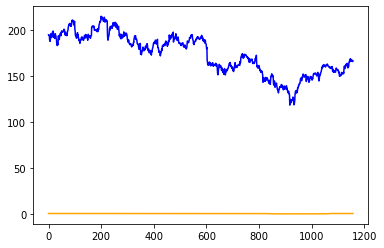

In [19]:
plt.plot(truth, 'b')
plt.plot(predict, 'orange')
plt.savefig(os.path.join(root, "results", date_time, "origin.png"))
plt.show()

In [20]:
predict = np.reshape(predict, (1, -1))
predict = np.squeeze(normalize(np.array(predict)))
truth = np.reshape(truth, (1, -1))
truth = np.squeeze(normalize(np.array(truth)))

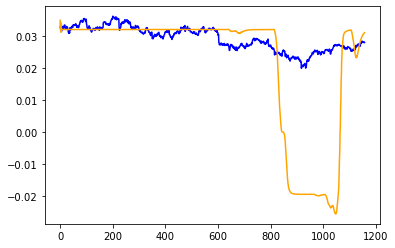

In [21]:
plt.plot(truth, 'b')
plt.plot(predict, 'orange')
plt.savefig(os.path.join(root, "results", date_time, "normalize.png"))
plt.show()